### Exercise 3.1

Convergence Details:
GD converged in 10000 iterations, final point: [0.99020202 0.98046061], f(x): 9.6155863643521e-05
Momentum GD converged in 3119 iterations, final point: [0.99999889 0.99999777], f(x): 1.244251563967269e-12
NAG converged in 3020 iterations, final point: [0.99999888 0.99999776], f(x): 1.2564856412113628e-12


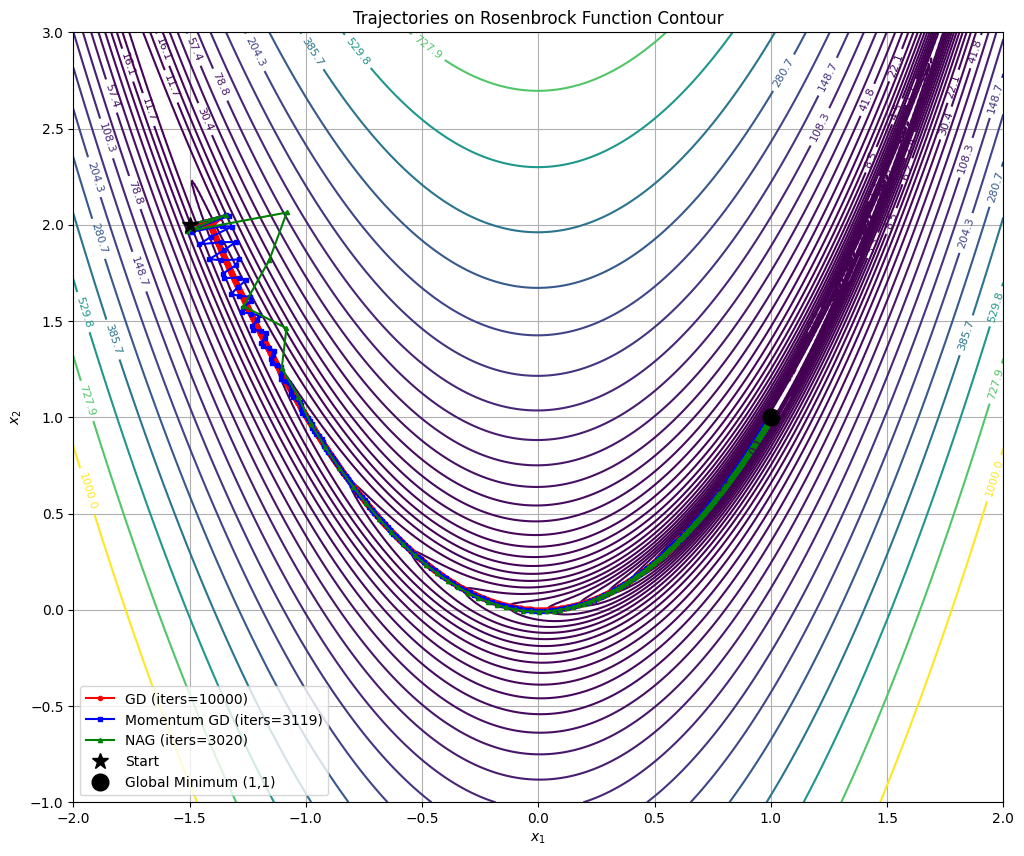

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def rosenbrock(x):
    return 100.0 * (x[1] - x[0]**2)**2 + (1 - x[0])**2

def rosenbrock_grad(x):
    grad_x1 = -400 * x[0]*(x[1] - x[0]**2) - 2*(1 - x[0])
    grad_x2 = 200 * (x[1] - x[0]**2)
    return np.array([grad_x1, grad_x2])

def gd_rosen(x0, eta, tol=1e-6, max_iters=10000):
    x = x0.copy()
    trajectory = [x.copy()]
    for it in range(max_iters):
        grad = rosenbrock_grad(x)
        if np.linalg.norm(grad) < tol:
            break
        x = x - eta * grad
        trajectory.append(x.copy())
    return np.array(trajectory), it+1

def momentum_rosen(x0, eta, beta, tol=1e-6, max_iters=10000):
    x = x0.copy()
    v = np.zeros_like(x0)
    trajectory = [x.copy()]
    for it in range(max_iters):
        grad = rosenbrock_grad(x)
        if np.linalg.norm(grad) < tol:
            break
        v = beta * v - eta * grad
        x = x + v
        trajectory.append(x.copy())
    return np.array(trajectory), it+1

def nag_rosen(x0, eta, beta, tol=1e-6, max_iters=10000):
    x = x0.copy()
    v = np.zeros_like(x0)
    trajectory = [x.copy()]
    for it in range(max_iters):
        y = x + beta * v
        grad = rosenbrock_grad(y)
        if np.linalg.norm(grad) < tol:
            break
        v = beta * v - eta * grad
        x = x + v
        trajectory.append(x.copy())
    return np.array(trajectory), it+1

x0 = np.array([-1.5, 2.0])
eta = 0.001
beta = 0.9
tol = 1e-6

traj_gd, iter_gd = gd_rosen(x0, eta, tol)
traj_mom, iter_mom = momentum_rosen(x0, eta, beta, tol)
traj_nag, iter_nag = nag_rosen(x0, eta, beta, tol)

print("Convergence Details:")
print(f"GD converged in {iter_gd} iterations, final point: {traj_gd[-1]}, f(x): {rosenbrock(traj_gd[-1])}")
print(f"Momentum GD converged in {iter_mom} iterations, final point: {traj_mom[-1]}, f(x): {rosenbrock(traj_mom[-1])}")
print(f"NAG converged in {iter_nag} iterations, final point: {traj_nag[-1]}, f(x): {rosenbrock(traj_nag[-1])}")

x1_vals = np.linspace(-2, 2, 400)
x2_vals = np.linspace(-1, 3, 400)
X1, X2 = np.meshgrid(x1_vals, x2_vals)
Z = 100.0 * (X2 - X1**2)**2 + (1 - X1)**2

plt.figure(figsize=(12, 10))
contours = plt.contour(X1, X2, Z, levels=np.logspace(-1, 3, 30), cmap='viridis')
plt.clabel(contours, inline=True, fontsize=8)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Trajectories on Rosenbrock Function Contour')
plt.plot(traj_gd[:,0], traj_gd[:,1], 'o-', color='red', markersize=3, label=f'GD (iters={iter_gd})')
plt.plot(traj_mom[:,0], traj_mom[:,1], 's-', color='blue', markersize=3, label=f'Momentum GD (iters={iter_mom})')
plt.plot(traj_nag[:,0], traj_nag[:,1], '^-', color='green', markersize=3, label=f'NAG (iters={iter_nag})')
plt.plot(x0[0], x0[1], 'k*', markersize=12, label='Start')
plt.plot(1, 1, 'ko', markersize=12, label='Global Minimum (1,1)')
plt.legend()
plt.grid(True)
plt.show()


| **Method**    | **Iterations** | **Final Point**            | **f(x)**             |
|---------------|----------------|----------------------------|----------------------|
| **GD**        | 10000          | [0.99020202, 0.98046061]   | 9.6155863643521e-05 |
| **Momentum GD** | 3119       | [0.99999889, 0.99999777]    | 1.244251563967269e-12 |
| **NAG**       | 3020          | [0.99999888, 0.99999776]    | 1.2564856412113628e-12 |

**Brief Explanation**  
- **GD (Vanilla Gradient Descent):** Takes the most iterations (10k) and converges to a point slightly away from \([1,1]\), leading to a higher final cost.  
- **Momentum GD:** Uses a momentum term to speed up convergence, requiring fewer iterations (3119) and getting extremely close to \([1,1]\).  
- **NAG (Nesterov Accelerated Gradient):** Similar idea to Momentum but uses a look-ahead step to adjust gradients. It converges slightly faster (3020 iterations) with a similarly low cost value.


## Exercise 3.2

In [4]:
import warnings
warnings.filterwarnings("ignore")


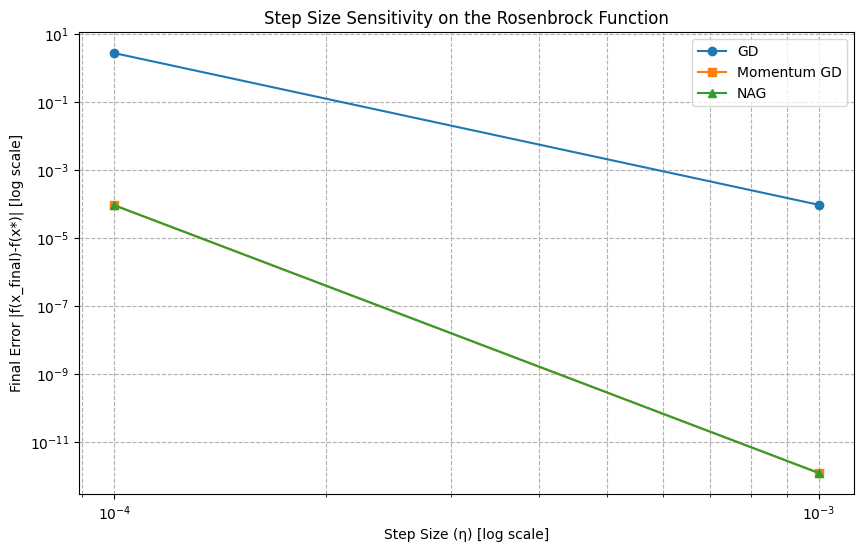

Step Size Sensitivity (Iteration Counts):
     Eta |         GD |    Momentum GD |    NAG
---------------------------------------------
  0.0001 |      10000 |          10000 |  10000
   0.001 |      10000 |           3119 |   3020
    0.01 |      10000 |          10000 |  10000
     0.1 |      10000 |          10000 |  10000


In [19]:
x_star = np.array([1.0, 1.0])
f_star = rosenbrock(x_star)
x0 = np.array([-1.5, 2.0])
betas = 0.9
etas = [0.0001, 0.001, 0.01, 0.1]
results = {
    'GD': {'errors': [], 'iters': []},
    'Momentum': {'errors': [], 'iters': []},
    'NAG': {'errors': [], 'iters': []}
}

for eta in etas:
    x_final, iters = gd_rosen(x0, eta)
    error = abs(rosenbrock(x_final) - f_star)
    results['GD']['errors'].append(error)
    results['GD']['iters'].append(iters)

    x_final, iters = momentum_rosen(x0, eta, betas)
    error = abs(rosenbrock(x_final) - f_star)
    results['Momentum']['errors'].append(error)
    results['Momentum']['iters'].append(iters)

    x_final, iters = nag_rosen(x0, eta, betas)
    error = abs(rosenbrock(x_final) - f_star)
    results['NAG']['errors'].append(error)
    results['NAG']['iters'].append(iters)

plt.figure(figsize=(10,6))
plt.plot(etas, results['GD']['errors'], 'o-', label='GD')
plt.plot(etas, results['Momentum']['errors'], 's-', label='Momentum GD')
plt.plot(etas, results['NAG']['errors'], '^-', label='NAG')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Step Size (η) [log scale]')
plt.ylabel('Final Error |f(x_final)-f(x*)| [log scale]')
plt.title('Step Size Sensitivity on the Rosenbrock Function')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

print("Step Size Sensitivity (Iteration Counts):")
print(f"{'Eta':>8} | {'GD':>10} | {'Momentum GD':>14} | {'NAG':>6}")
print("-"*45)
for i, eta in enumerate(etas):
    print(f"{eta:8} | {results['GD']['iters'][i]:10} | {results['Momentum']['iters'][i]:14} | {results['NAG']['iters'][i]:6}")


plotting momentum GD for Clarity


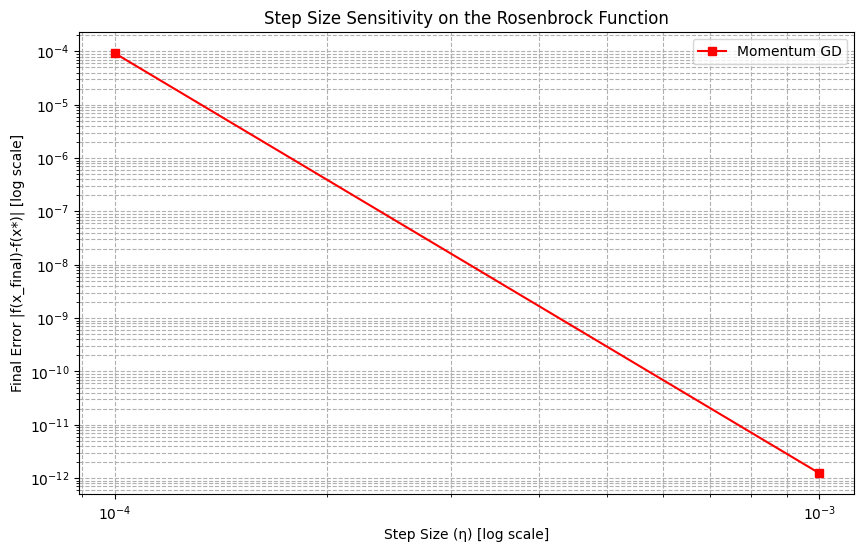

In [20]:
print("plotting momentum GD for Clarity")
plt.figure(figsize=(10,6))
plt.plot(etas, results['Momentum']['errors'], 's-', c = 'r', label='Momentum GD')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Step Size (η) [log scale]')
plt.ylabel('Final Error |f(x_final)-f(x*)| [log scale]')
plt.title('Step Size Sensitivity on the Rosenbrock Function')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

### Trade-offs (speed Vs stability)



- **Stability Condition:** For GD, stability requires $(\eta < \frac{2}{L})$ (with \(L\) being the Lipschitz constant). Too small $(\eta)$ (e.g., \(0.0001\)) guarantees stability but causes slow convergence, while too large $(\eta)$ (e.g., \(0.01\) or \(0.1\)) may violate this inequality.

- **Speed vs. Stability Trade-off:**  
  - **Small $(\eta)$:** Ensures stability (no overshooting) but requires many iterations.
  - **Moderate $(\eta)$:** Approaches the optimal balance where momentum methods (Momentum GD, NAG) further accelerate convergence by incorporating past gradient information, effectively reducing the effective condition number.
  - **Large $(\eta)$:** Increases the risk of oscillations or divergence, leading to no effective convergence within the iteration cap.

Thus, momentum and NAG achieve faster convergence at a moderate $(\eta)$ due to their use of previous gradients to adjust the update direction, while vanilla GD remains sensitive to step size selection.